## load Thư viện

In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

## load data

In [24]:
df1=pd.read_csv('raw(tgdd).csv')
df2=pd.read_csv('raw(fpt).csv')

In [25]:
df=pd.concat([df1,df2])

In [26]:

df=df.reset_index(drop=True)
df

,man_hinh,he_dieu_hanh,cmr_sau,cmr_trc,chip,ram,D_lg,esim,pin_sac,gia
0,"Dynamic AMOLED 2X 6.6"" Full HD+",Android 12,50,10 MP,Snapdragon 8 Gen 1,8 GB,128 GB,1,4500 mAh,20.990.000₫
1,"OLED 6.1"" Super Retina XDR",iOS 15,12,12 MP,Apple A15 Bionic,4 GB,128 GB,1,3240 mAh,19.990.000₫ *
2,"AMOLED 6.78"" Full HD+",Android 12,50,32 MP,MediaTek Dimensity 9000,12 GB,256 GB,0,4500 mAh,17.990.000₫
3,"OLED 5.4"" Super Retina XDR",iOS 15,12,12 MP,Apple A15 Bionic,4 GB,128 GB,1,2438 mAh,17.490.000₫ *
4,"Dynamic AMOLED 2X 6.1"" Full HD+",Android 12,50,10 MP,Snapdragon 8 Gen 1,8 GB,128 GB,1,3700 mAh,16.990.000₫
...,...,...,...,...,...,...,...,...,...,...
195,"6.51 inch, IPS LCD, HD+, 720 x 1600 Pixels",Android 11,13.0 MP,8.0 MP,Helio P35,4 GB + 1 GB,64 GB,0,5000 mAh,3.690.000₫
196,"6.51 inch, IPS LCD, HD+, 720 x 1600 Pixels",Android 12,50.0 MP,8.0 MP,Helio G80,4 GB + 1 GB,128 GB,0,5000 mAh,4.490.000₫
197,"6.58 inch, IPS LCD, FHD+, 2408 x 1080 Pixels",Android 12,50.0 MP,16.0 MP,MediaTek Helio G81,8 GB,128 GB,0,5000 mAh,5.990.000₫
198,"Chính: 6.51 inch, Chính: LCD, HD+, 720 x 1600 ...",Android 12,8.0 MP,5.0 MP,Helio P22,2 GB,32 GB,0,5000 mAh,2.790.000₫


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   man_hinh      200 non-null    object
 1   he_dieu_hanh  200 non-null    object
 2   cmr_sau       200 non-null    object
 3   cmr_trc       200 non-null    object
 4   chip          200 non-null    object
 5   ram           200 non-null    object
 6   D_lg          200 non-null    object
 7   esim          200 non-null    int64 
 8   pin_sac       200 non-null    object
 9   gia           200 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.8+ KB


In [28]:
df.columns

Index(['man_hinh', 'he_dieu_hanh', 'cmr_sau', 'cmr_trc', 'chip', 'ram', 'D_lg',
       'esim', 'pin_sac', 'gia'],
      dtype='object')

## Tiền xử lí dữ liệu

In [29]:
df=df.reset_index()
def tach_chuoi(text):
    text=str(text)
    text=text.replace('"',' "')
    text=text.split()
    return text
def xl_man_hinh(a):
    for i in range(len(a)):
        if a[i]=='inch,':
            a=a[i-1]
            break
        else:
            if a[i]=='"':
                a=a[i-1]
                break
    return a
df['man_hinh']=df['man_hinh'].apply(tach_chuoi)

a=df['man_hinh']

for i in range(len(a)):
    a[i]=xl_man_hinh(a[i])
    
df['man_hinh']=a  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10360\1674046270.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=xl_man_hinh(a[i])


In [30]:
def xl_byte(text):
    text=str(text).replace('4 GB + 1 GB','5')
    text=str(text).replace('GB','')
    text=str(text).replace(' TB','000')
    return text
df['ram']=df['ram'].apply(xl_byte)
df['D_lg']=df['D_lg'].apply(xl_byte)
print(df['ram'].value_counts())
print(df['D_lg'].value_counts())

8      64
4      55
3      27
6      24
2      17
12      9
16      2
5       2
Name: ram, dtype: int64
128     90
32      41
64      30
256     27
512      8
1000     4
Name: D_lg, dtype: int64


In [31]:
def xl_pin(text):
    text=str(text)
    text=text.replace('mAh','')
    return text
df['pin_sac']=df['pin_sac'].apply(xl_pin)

In [32]:
def xl_cmrs(text):
    text=str(text)
    text=text.replace('&','+').replace(',','+')
    text=text.replace('Chính','').replace('Phụ','').replace('camera','*').replace('.0','')
    text=text.replace('MP','')
    return text
df['cmr_sau']=df['cmr_sau'].apply(xl_cmrs)
df['cmr_trc']=df['cmr_trc'].apply(xl_cmrs)

In [33]:
tong_cmrs=[]
for i in df['cmr_sau']:
    tong=0
    a=i.count('+')
    b=i.count('*')
    tong=a+b+1
    tong_cmrs.append(tong)
tong_cmrs
df['tong_cmrs']=tong_cmrs


In [34]:
def xl_gia(text):
    text=str(text)
    text=text.replace('₫','')
    text=text.replace('.','')
    text=text.replace('*','')
    return text

In [35]:
df['gia']=df['gia'].apply(xl_gia)

In [36]:
df.replace('nan',np.nan)
df.isna().sum()
df=df.dropna()
df=df.reset_index()

In [37]:
df['man_hinh']=df['man_hinh'].astype('float64', copy=False)
df['cmr_trc']=df['cmr_trc'].astype('int64', copy=False)
df['cmr_sau']=df['cmr_sau'].astype('int64', copy=False)
df['ram']=df['ram'].astype('int64', copy=False)
df['D_lg']=df['D_lg'].astype('int64', copy=False)
df['esim']=df['esim'].astype('int64', copy=False)
df['pin_sac']=df['pin_sac'].astype('int64', copy=False)
df['gia']=df['gia'].astype('int64', copy=False)
df['tong_cmrs']=df['tong_cmrs'].astype('int64', copy=False)

In [38]:
s=df['gia']

In [39]:
df['gia'].value_counts()

3990000     7
3190000     6
2990000     6
4490000     6
11990000    5
           ..
15490000    1
15990000    1
4090000     1
8090000     1
9390000     1
Name: gia, Length: 106, dtype: int64

In [22]:
df

,level_0,index,man_hinh,he_dieu_hanh,cmr_sau,cmr_trc,chip,ram,D_lg,esim,pin_sac,gia,tong_cmrs
0,0,0,6.60,Android 12,50,10,Snapdragon 8 Gen 1,8,128,1,4500,20990000,1
1,1,1,6.10,iOS 15,12,12,Apple A15 Bionic,4,128,1,3240,19990000,1
2,2,2,6.78,Android 12,50,32,MediaTek Dimensity 9000,12,256,0,4500,17990000,1
3,3,3,5.40,iOS 15,12,12,Apple A15 Bionic,4,128,1,2438,17490000,1
4,4,4,6.10,Android 12,50,10,Snapdragon 8 Gen 1,8,128,1,3700,16990000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,6.51,Android 11,13,8,Helio P35,5,64,0,5000,3690000,1
196,196,196,6.51,Android 12,50,8,Helio G80,5,128,0,5000,4490000,1
197,197,197,6.58,Android 12,50,16,MediaTek Helio G81,8,128,0,5000,5990000,1
198,198,198,6.51,Android 12,8,5,Helio P22,2,32,0,5000,2790000,1


## Thăm dò dataset


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

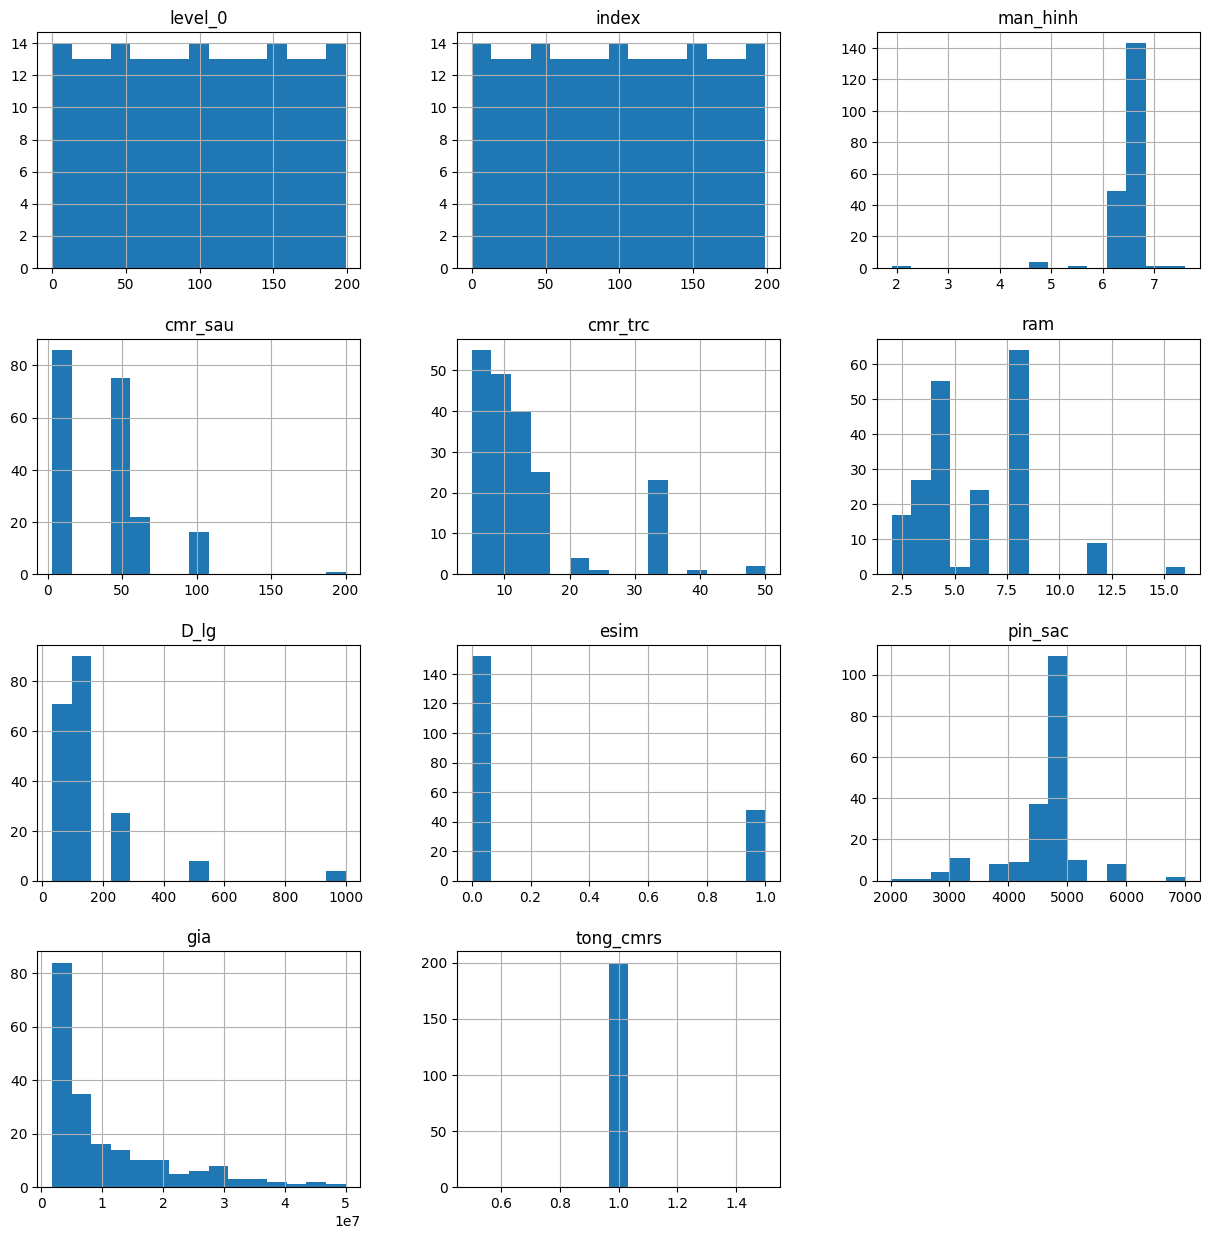

In [21]:
df.hist(figsize=(15,15),bins=15)
plt.show()

* HeatMap

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15492\1681024991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='hot_r')


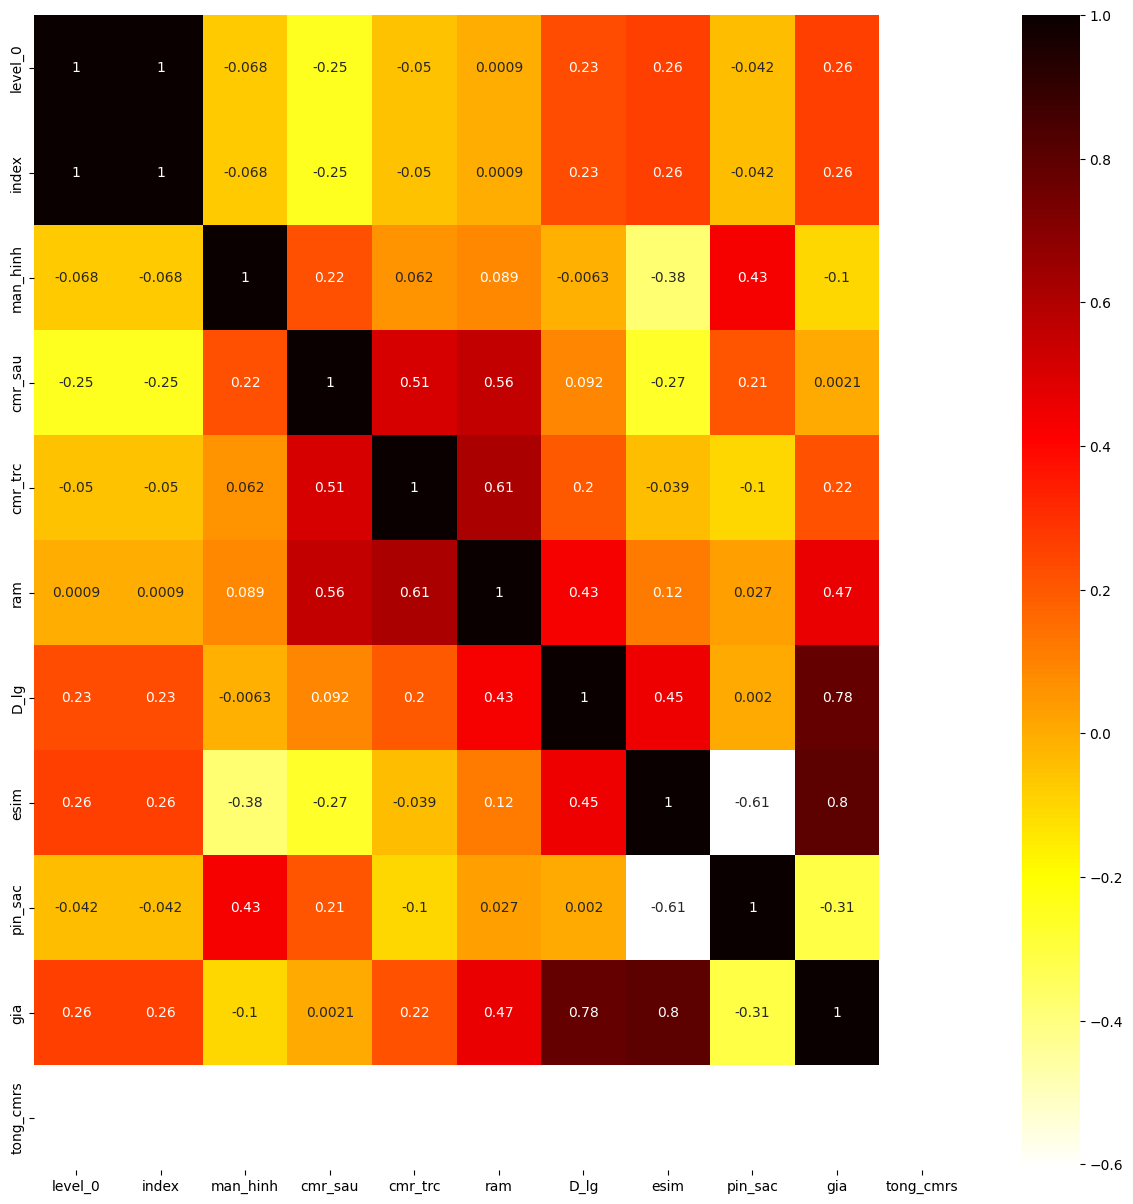

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='hot_r')
plt.show()

In [21]:
df.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15492\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,level_0,index,man_hinh,cmr_sau,cmr_trc,ram,D_lg,esim,pin_sac,gia,tong_cmrs
level_0,1.000000,1.000000,-0.067896,-0.248453,-0.050335,0.000896,0.233472,0.264035,-0.041764,0.263457,NaN
index,1.000000,1.000000,-0.067896,-0.248453,-0.050335,0.000896,0.233472,0.264035,-0.041764,0.263457,NaN
man_hinh,-0.067896,-0.067896,1.000000,0.223409,0.062211,0.088750,-0.006323,-0.379169,0.428786,-0.100675,NaN
cmr_sau,-0.248453,-0.248453,0.223409,1.000000,0.507245,0.556527,0.092043,-0.267348,0.209031,0.002062,NaN
cmr_trc,-0.050335,-0.050335,0.062211,0.507245,1.000000,0.614450,0.199441,-0.038818,-0.104008,0.215305,NaN
ram,0.000896,0.000896,0.088750,0.556527,0.614450,1.000000,0.430100,0.120398,0.026501,0.465822,NaN
D_lg,0.233472,0.233472,-0.006323,0.092043,0.199441,0.430100,1.000000,0.450957,0.001987,0.782234,NaN
esim,0.264035,0.264035,-0.379169,-0.267348,-0.038818,0.120398,0.450957,1.000000,-0.607958,0.801297,NaN
pin_sac,-0.041764,-0.041764,0.428786,0.209031,-0.104008,0.026501,0.001987,-0.607958,1.000000,-0.311971,NaN
gia,0.263457,0.263457,-0.100675,0.002062,0.215305,0.465822,0.782234,0.801297,-0.311971,1.000000,NaN


In [22]:
columns=['man_hinh','cmr_trc','ram','D_lg','esim','pin_sac','gia']

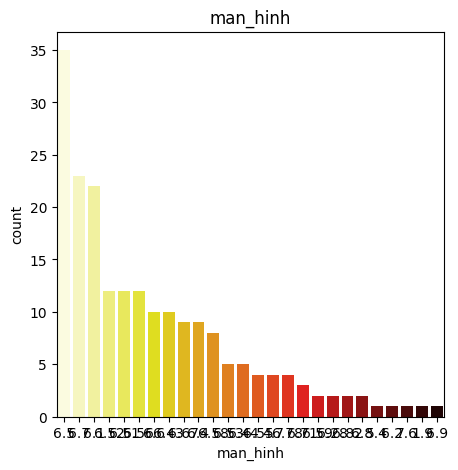

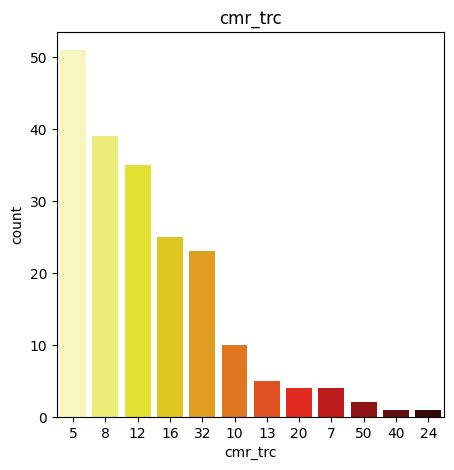

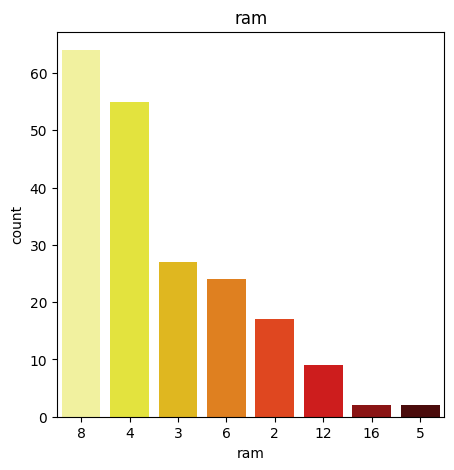

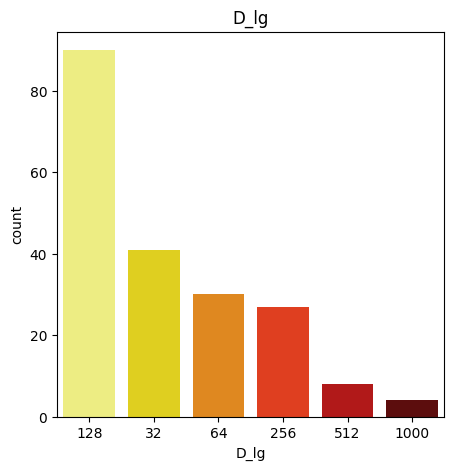

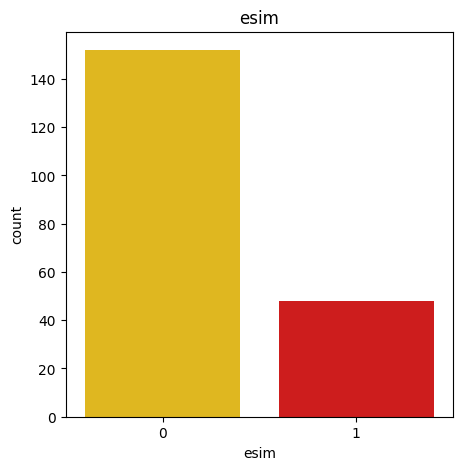

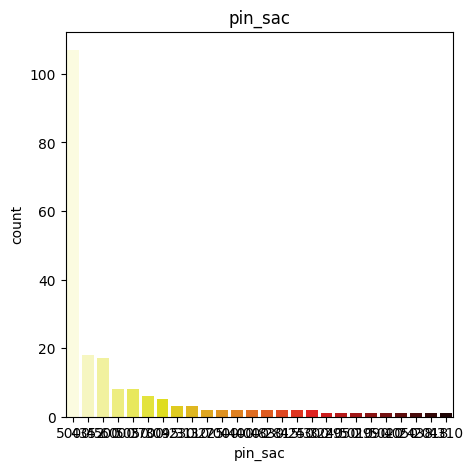

In [23]:

for col in columns:
    if len(df[col].unique()) <30:
        plt.figure(figsize=(5,5))
        sns.countplot(data =df,x=col,order=df[col].value_counts().index, palette =sns.color_palette("hot_r",len(df[col].unique()+5)))
        plt.title(col)
        plt.show()

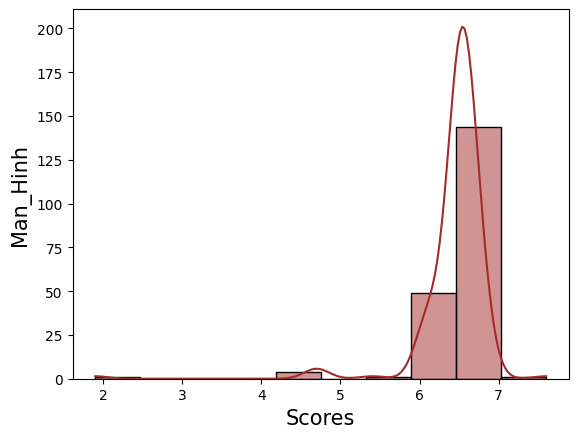

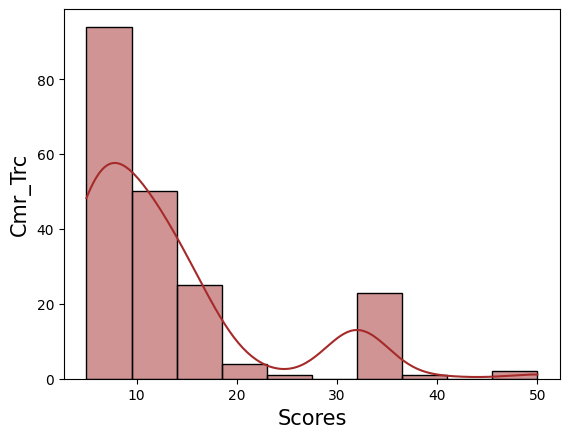

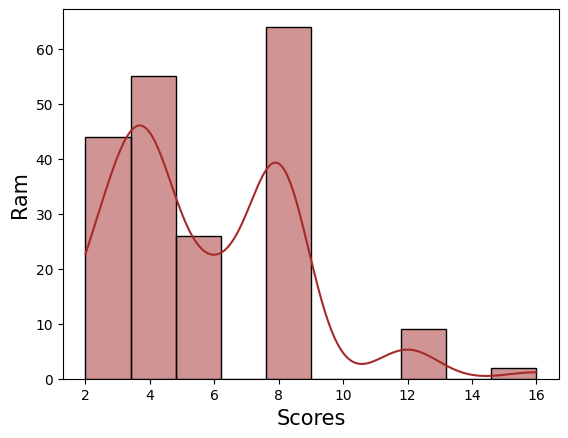

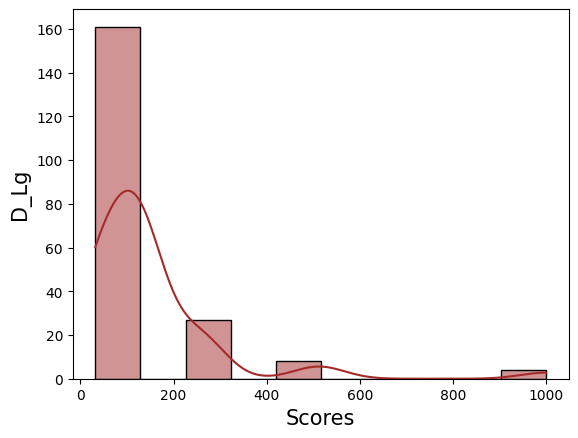

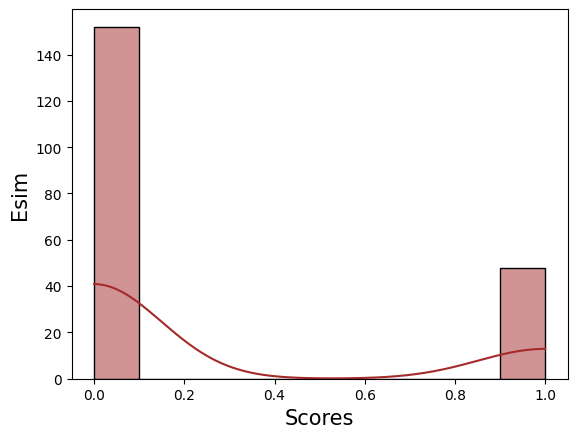

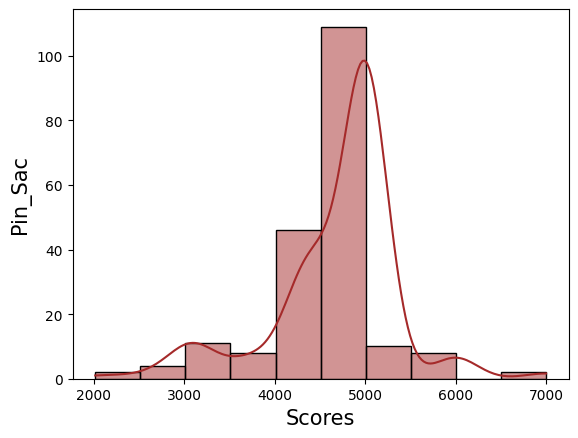

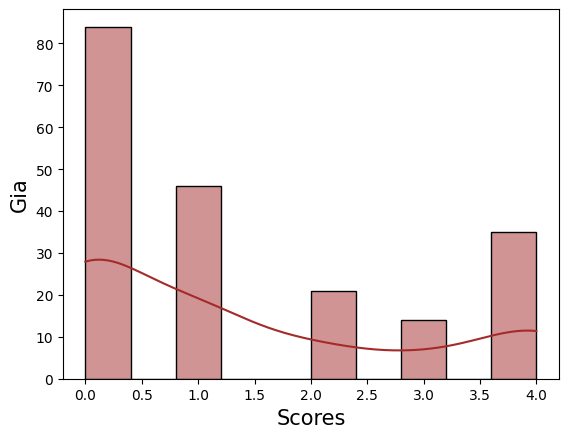

In [467]:
#Biểu đồ hiển thị tần suất giá trị của các
for col in columns:
    sns.histplot(df[col], kde=True, bins=10,color = "Brown")
    
    plt.ylabel(col.title(),fontsize=15)
    plt.xlabel("Scores",fontsize=15)
    plt.show()

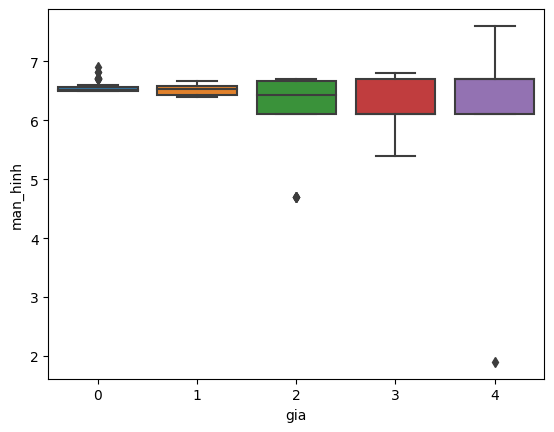

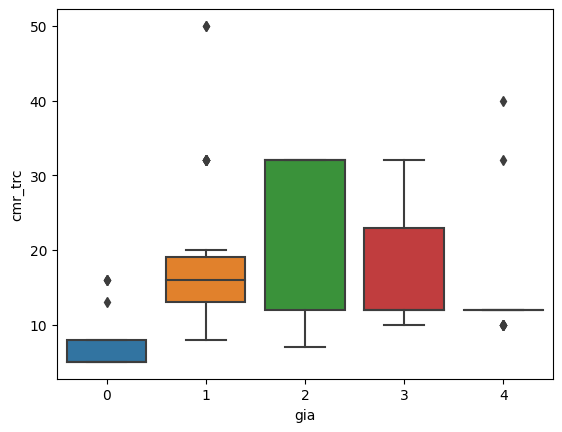

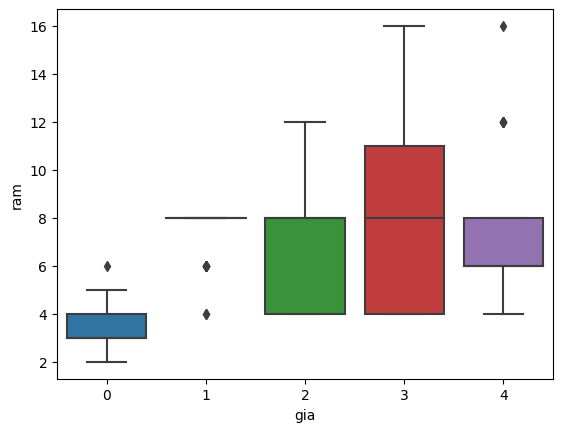

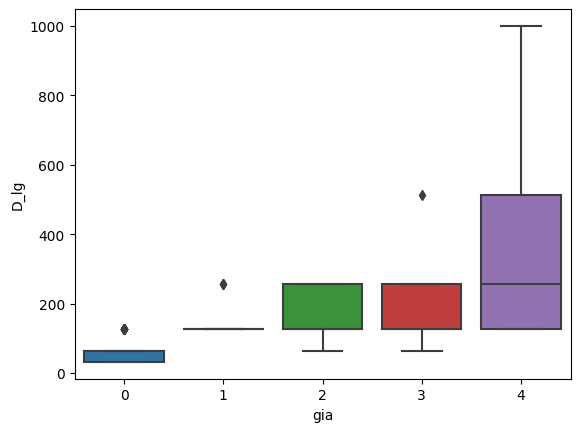

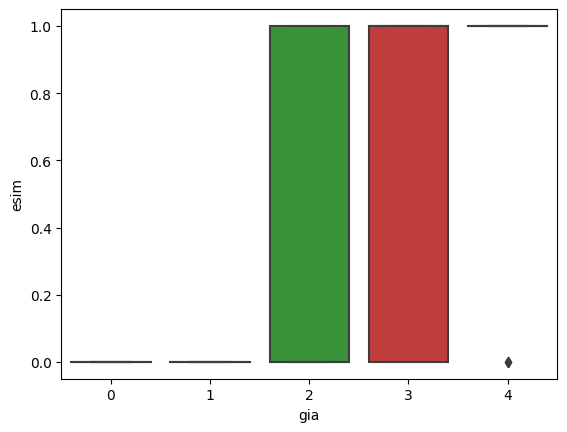

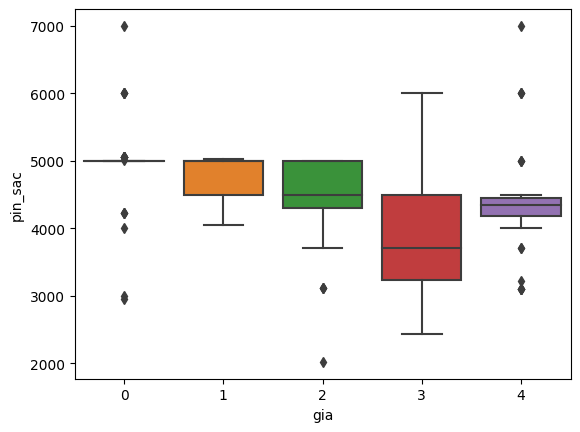

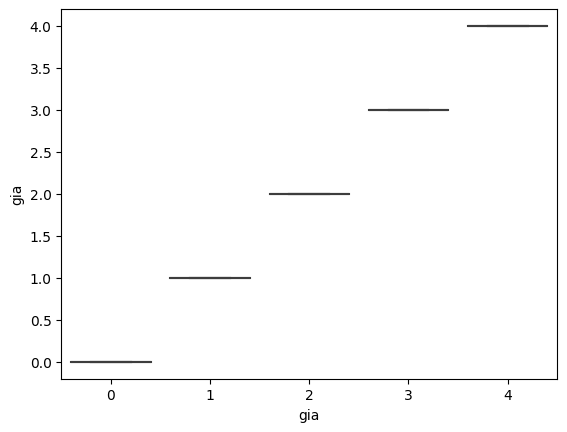

In [468]:
for col in columns:
        sns.boxplot(x="gia", y=col, data=df)
        plt.show()

## Xây dựng mô hình

In [441]:
df=df[['man_hinh','cmr_trc','ram','D_lg','esim','pin_sac','gia']]
df

,man_hinh,cmr_trc,ram,D_lg,esim,pin_sac,gia
0,6.60,10,8,128,1,4500,4
1,6.10,12,4,128,1,3240,3
2,6.78,32,12,256,0,4500,3
3,5.40,12,4,128,1,2438,3
4,6.10,10,8,128,1,3700,3
...,...,...,...,...,...,...,...
195,6.51,8,5,64,0,5000,0
196,6.51,8,5,128,0,5000,0
197,6.58,16,8,128,0,5000,1
198,6.51,5,2,32,0,5000,0


In [442]:
#Chia dataset thanh x va y
X=df.drop(['gia'],axis=1)
Y=df['gia']
Y

0      4
1      3
2      3
3      3
4      3
      ..
195    0
196    0
197    1
198    0
199    2
Name: gia, Length: 200, dtype: int64

In [443]:
#x,y to x_train , y_train, x_test, y_test
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4,test_size=0.3)

**Mô hình Linear Regression**

In [444]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)

In [445]:
from sklearn.metrics import mean_squared_error
predict=lr.predict(x_test)
print(mean_squared_error(predict,y_test))
print(lr_score)

0.14721513196058664
0.9304404154012191


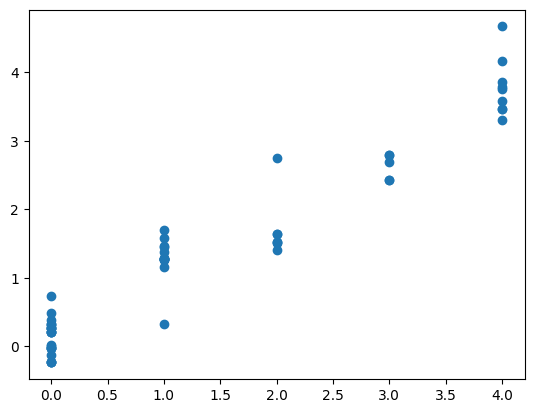

In [446]:
plt.scatter(y_test,predict)
plt.show()

**Mô hình KNN**

In [447]:
y_train

77     0
127    0
5      3
118    2
113    4
      ..
104    1
129    0
183    0
174    0
122    1
Name: gia, Length: 140, dtype: int64

In [448]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_score = knn.score(x_test,y_test)

In [449]:
knn_predict=knn.predict(x_test)
print(knn_score)
print(mean_squared_error(knn_predict,y_test))

0.6333333333333333
1.7


In [450]:
from sklearn.metrics import classification_report
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       0.53      0.64      0.58        14
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.44      0.44      0.44         9

    accuracy                           0.63        60
   macro avg       0.37      0.42      0.39        60
weighted avg       0.56      0.63      0.60        60



C:\Users\ADMIN\anaconda3\envs\XuanNhat\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\envs\XuanNhat\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\envs\XuanNhat\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Mô hình Decision Tree**

In [451]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state =1)
dtr.fit(x_train,y_train)
dtr_score = dtr.score(x_test,y_test)

In [452]:
dtr_predict=dtr.predict(x_test)
print(dtr_score)
print(mean_squared_error(dtr_predict,y_test))

0.9035306470665442
0.20416666666666666


**Mô hình Neural network**

In [454]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X.values)

In [455]:
Y = Y.values.reshape(-1,1)

In [456]:
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
Y = ohot.fit_transform(Y)
Y = Y.toarray()

In [457]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, Y, test_size=0.30, random_state=100)

In [469]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(X_train_NN.shape[1],))),
model.add(Dense(8,activation='relu')),
model.add(Dense(5,activation='softmax')),
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.save('my_model.h5')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                112       
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dense_32 (Dense)            (None, 5)                 45        
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [470]:
history = model.fit(X_train_NN,y_train_NN,epochs=100,validation_data=(X_test_NN,y_test_NN),batch_size=64)

Epoch 1/100
3/3 [==============================] - 0s 65ms/step - loss: 1.5566 - accuracy: 0.4643 - val_loss: 1.4914 - val_accuracy: 0.5833
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 1.5380 - accuracy: 0.4714 - val_loss: 1.4760 - val_accuracy: 0.5667
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 1.5194 - accuracy: 0.4786 - val_loss: 1.4609 - val_accuracy: 0.5667
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 1.5013 - accuracy: 0.4857 - val_loss: 1.4461 - val_accuracy: 0.5667
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4839 - accuracy: 0.4857 - val_loss: 1.4315 - val_accuracy: 0.5667
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 1.4664 - accuracy: 0.4857 - val_loss: 1.4174 - val_accuracy: 0.5833
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.4500 - accuracy: 0.5143 - val_loss: 1.4036 - val_accuracy: 0.5833
Epoch 8/100
3/3 [===

In [471]:
y_pred_NN = model.predict(X_test_NN)
pred = []
for i in range(len(y_pred_NN)):
    pred.append(np.argmax(y_pred_NN[i]))
test = []
for i in range(len(y_test_NN)):
    test.append(np.argmax(y_test_NN[i]))
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Model is = " + str(acc*100))


2/2 [==============================] - 0s 5ms/step
Accuracy of Model is = 81.66666666666667


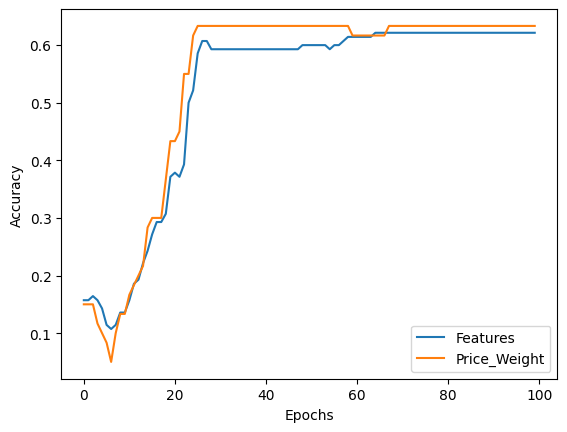

In [461]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='lower right')
plt.show()

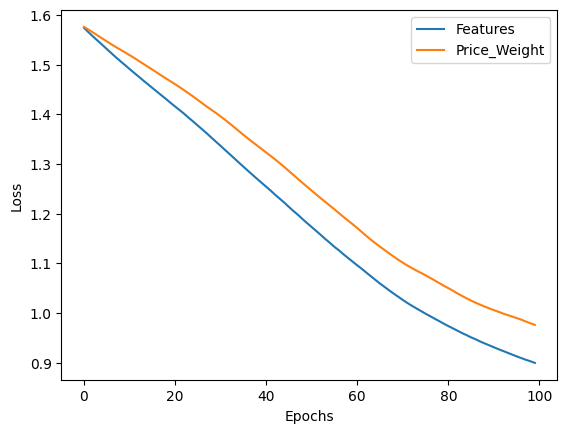

In [462]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper right')
plt.show()

In [463]:
print('MAE:', metrics.mean_absolute_error(y_test_NN, y_pred_NN))  
print('MSE:', metrics.mean_squared_error(y_test_NN, y_pred_NN))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_NN, y_pred_NN)))
print('VarScore:',metrics.explained_variance_score(y_test_NN,y_pred_NN))

MAE: 0.2028637463808991
MSE: 0.09324721408140972
RMSE: 0.3053640680915319
VarScore: 0.24663286943403845


## So sánh các model

In [464]:
print("Linear Regression Model Score la ",round(lr_score*100))
print("KNeighborsClassifier Model Score la ",round(knn_score*100))
print("Decision tree  Regression Model Score la ",round(dtr_score*100))
print("Neural Network Score la ",round(acc*100))


models_score =pd.DataFrame({'Model':['Linear Regression','KNeighborsClassifier','Decision Tree','Neural Network',],
                            'Score':[lr_score,knn_score,dtr_score,acc],
                           })
models_score.sort_values(by='Score',ascending=False)

Linear Regression Model Score la  93
KNeighborsClassifier Model Score la  63
Decision tree  Regression Model Score la  90
Neural Network Score la  63


,Model,Score
0,Linear Regression,0.930440
2,Decision Tree,0.903531
1,KNeighborsClassifier,0.633333
3,Neural Network,0.633333


* Mô hình Linear Regression cho kết quả tốt nhất